In [1]:
!python -m pip install json-lines

In [2]:
import json_lines

with open('Illinois-20200302-xml/data/data.jsonl/data.jsonl', 'rb') as f: # opening file in binary(rb) mode 
    df = list(json_lines.reader(f))
    for item in json_lines.reader(f):
        print(item) #or use print(item['X']) for printing specific data
        break

In [3]:
import json

tot = len(df)
json_list = []
json_date = []

for n in range(0,tot):
    json_list.append(json.dumps(df[n]['casebody']))
    json_date.append(json.dumps(df[n]['decision_date']))

In [4]:
import re
import nltk
import json
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):
    # Convert words to lower case
    text = text.lower() 

    text = re.sub('<.*?>', ' ', text)
    text = re.sub('[a-zA-Z]+\\\\[a-zA-Z]+', ' ', text)
    text = re.sub('\\\\[a-zA-Z]+', ' ', text)
    text = re.sub('\\\\"', '"', text)
    text = re.sub('[0-9]+[a-zA-Z]+', '', text)
    text = re.sub('\*', '', text)
    text = re.sub('amp', '', text)
    text = re.sub('[0-9]+', '', text)
    
    #Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = " ".join([i for i in text.split() if i not in stop_words])
    
    #Remove punctuation
    words = nltk.word_tokenize(text)
    text = [word for word in words if word.isalnum()]

    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tompe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tompe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
# for topic model

texts = []

for sentence in json_list:
    texts.append(clean_text(sentence))

In [ ]:
narcotics = ['cannabis', 'cocaine', 'methamphetamine', 'smart drugs', 'marijuana', 'MDMA', 'LSD', 'KETAMINA', 'heroin', 'fentanyl']
weapons = ['gun', 'knife', 'weapon', 'firearm', 'rifle', 'carabine', 'shotgun', 'assaults rifle', 'sword', 'blunt objects'] 
investigation = ['gang', 'mafia', 'serial kiler', 'rape', 'thefts', 'recidivism', 'arrest', 'ethnicity', 'caucasian', 'afroamerican', 'native american', 'hispanic', 'gender', 'male', 'female', 'man', 'woman', 'girl', 'boy', 'robbery', 'cybercrime']

In [ ]:
from collections import Counter
from math import log
from nltk import word_tokenize
from nltk.corpus import brown

nltk.download('brown')

In [89]:
trend_dateNarco = []
countSent = 0
countDate = 0
    
for sentence in texts:
    for narcos in narcotics:
        if narcos in sentence:
            trend_dateNarco.append(json_date[countDate])
            break
    countDate += 1

In [100]:
#trend_dateNarco
from datetime import datetime

trendNarco = []
for data in trend_dateNarco:
    if len(data) == 9:
        #gg+mm
        data = data.replace('"', "")
        
        #print("1")
        #print(data)
    elif len(data) < 9:
        #aa
        data = data.replace('"', "")
        
        #pritn("2")
        #print(data)
    else:
        #a-m-g
        data = data.replace('"', "")
        
        #print("3")
        #print(data)
    trendNarco.append(data)

In [104]:
test = [x.split("-")[0] for x in trendNarco]
from collections import Counter
countDateNarcos = Counter(test)

In [ ]:
countDateNarcos

<BarContainer object of 141 artists>

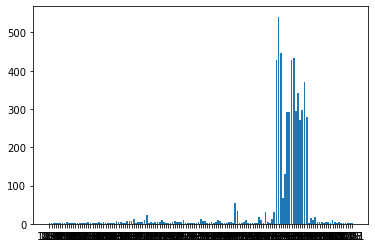

In [106]:
import matplotlib.pyplot as plt
plt.bar(countDateNarcos.keys(), countDateNarcos.values())

In [116]:
import pandas as pd
df = pd.DataFrame.from_dict(countDateNarcos, orient='index').reset_index()
df.head()

,index,0
0,1828,1
1,1841,1
2,1843,1
3,1845,2
4,1850,1


In [128]:
filtereDf = df.loc[df[0] > 0]
filtereDf = filtereDf.sort_values('index')

<AxesSubplot:>

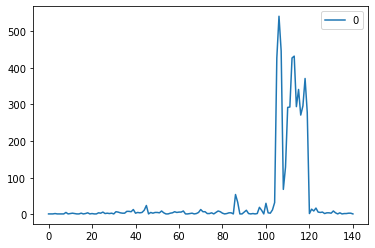

In [129]:
filtereDf.plot()

In [132]:
df.loc[df[0] > 300]

,index,0
105,1973,427
106,1974,541
107,1975,446
112,1980,427
113,1981,432
115,1983,341
118,1986,371


he Federal Comprehensive Drug Abuse Prevention and Control Act of 1970, more commonly known as the Controlled Substances Act, became effective on May 1, 1971. ... The goal of the Controlled Substances Act is to improve the manufacturing, importation and exportation, distribution, and dispensing of controlled substances.


The Drug Enforcement Administration (DEA) 1980-1985

---------------------------------------  Other

In [133]:
trend_dateInvestigation = []
countSent = 0
countDate = 0
    
for sentence in texts:
    for inv in investigation:
        if inv in sentence:
            trend_dateInvestigation.append(json_date[countDate])
            break
    countDate += 1

In [134]:
trendInvestigation = []
for data in trend_dateInvestigation:
    if len(data) == 9:
        #gg+mm
        data = data.replace('"', "")
        
        #print("1")
        #print(data)
    elif len(data) < 9:
        #aa
        data = data.replace('"', "")
        
        #pritn("2")
        #print(data)
    else:
        #a-m-g
        data = data.replace('"', "")
        
        #print("3")
        #print(data)
    trendInvestigation.append(data)

In [135]:
test = [x.split("-")[0] for x in trendInvestigation]
from collections import Counter
countDateInvestigation = Counter(test)

<BarContainer object of 187 artists>

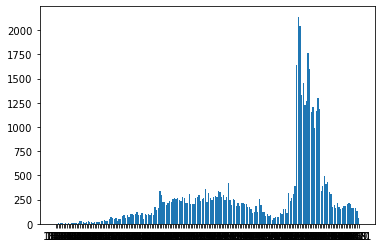

In [136]:
import matplotlib.pyplot as plt
plt.bar(countDateInvestigation.keys(), countDateInvestigation.values())

In [137]:
dfInv = pd.DataFrame.from_dict(countDateInvestigation, orient='index').reset_index()
dfInv.head()

,index,0
0,1820,1
1,1823,1
2,1825,5
3,1826,4
4,1828,5


In [140]:
dfInv.loc[dfInv[0] > 1000]

,index,0
148,1973,1639
149,1974,2138
150,1975,2041
151,1976,1331
152,1977,1453
153,1978,1230
154,1979,1269
155,1980,1763
156,1981,1596
157,1982,1150


In [ ]:
# CHECK WEAPON AND CHEK SENTENCES BY YEAR (GENERALLY SPEAKING)

In [141]:
# weapon

trend_dateWeapon = []
countSent = 0
countDate = 0
    
for sentence in texts:
    for inv in weapons:
        if inv in sentence:
            trend_dateWeapon.append(json_date[countDate])
            break
    countDate += 1
    
trendWeapon = []
for data in trend_dateWeapon:
    if len(data) == 9:
        #gg+mm
        data = data.replace('"', "")
        
        #print("1")
        #print(data)
    elif len(data) < 9:
        #aa
        data = data.replace('"', "")
        
        #pritn("2")
        #print(data)
    else:
        #a-m-g
        data = data.replace('"', "")
        
        #print("3")
        #print(data)
    trendWeapon.append(data)
    
test = [x.split("-")[0] for x in trendWeapon]
from collections import Counter
countDateWeapon = Counter(test)

<BarContainer object of 170 artists>

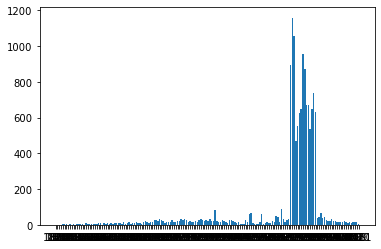

In [142]:
import matplotlib.pyplot as plt
plt.bar(countDateWeapon.keys(), countDateWeapon.values())

In [143]:
dfInv.loc[dfInv[0] > 800]

,index,0
148,1973,1639
149,1974,2138
150,1975,2041
151,1976,1331
152,1977,1453
153,1978,1230
154,1979,1269
155,1980,1763
156,1981,1596
157,1982,1150


In [8]:
# general
import pandas as pd
df = pd.DataFrame(json_date)


In [9]:
df.head()

,0
0,"""1997-05-01"""
1,"""1997-04-17"""
2,"""1997-03-20"""
3,"""1997-05-01"""
4,"""1997-04-17"""


In [10]:
year = []

for y in json_date:
    data = ""
    if len(y) == 9:
        #gg+mm
        data = y.replace('"', "")
        
        #print("1")
        #print(data)
    elif len(data) < 9:
        #aa
        data = y.replace('"', "")
        
        #pritn("2")
        #print(data)
    else:
        #a-m-g
        data = y.replace('"', "")
    year.append(data.split("-")[0])



In [11]:
df = pd.DataFrame(year)
df.head()

,0
0,1997
1,1997
2,1997
3,1997
4,1997


In [12]:
dfNum = pd.DataFrame({'count' : df.groupby( [0] ).size()}).reset_index()

In [24]:
dfNum.loc[dfNum['count'] > 2500]

,0,count
154,1973,2748
155,1974,3152
156,1975,3097
161,1980,2543
